#  Importing Libraries


In [1]:
import numpy as np  #helps in working with data in the form arrays
import pandas as pd #helps in performing data preprocessing and importing of data

In [2]:
import tensorflow as tf #Module to work for NLP,You will learn to process text, including tokenizing and representing sentences as vectors, so that they can be input to a neural network.
import matplotlib.pyplot as plt #module for producing visualizations of datasets
import nltk #Natural language toolkit
nltk.download('stopwords') 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re #module to work with regular expressions
import pickle
import seaborn as sns #module to work on visualizations
from sklearn.svm import LinearSVC #scikit learn module - used for training the model and determining the algorithm to be used
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Importing Dataset

In [3]:
df = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Analysing the Data

In [4]:
df.shape

(1600000, 6)

In [5]:
df.columns=['sentiments','id','date','query','user','tweet']

In [6]:
df.head()

,sentiments,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df=df[['sentiments','tweet']]

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

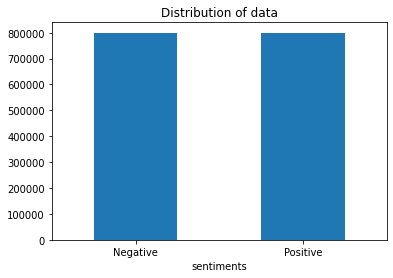

In [8]:
ax = df.groupby('sentiments').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)


# Preprocessing the Data
* Stemming 
* Lematization
* removing Hyperlinks and useraccounts
* removing Stopwords

using NLTK for text processing

In [9]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [10]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [11]:
df.tweet = df.tweet.apply(lambda x: preprocess(x))

In [12]:
tweet , sentiments = list(df['tweet']), list(df['sentiments'])

In [13]:
df.head()

,sentiments,tweet
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many times ball managed save 50 rest go ...
3,0,whole body feels itchy like fire
4,0,behaving mad see


# Train and Test Split

In [14]:
X_train, X_test, y_train, y_test=train_test_split(tweet,sentiments,test_size=0.05,random_state=0)

# TF-IDF Vectorizing

In [15]:
vectoriser=TfidfVectorizer(ngram_range=(1,2),max_features=50000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=50000, ngram_range=(1, 2))

In [16]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

# Creating Models

In [17]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    

# Logistic Regression

              precision    recall  f1-score   support

           0       0.80      0.77      0.79     39989
           4       0.78      0.81      0.79     40011

    accuracy                           0.79     80000
   macro avg       0.79      0.79      0.79     80000
weighted avg       0.79      0.79      0.79     80000



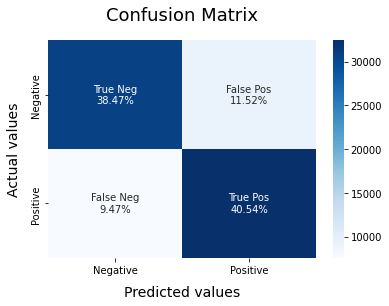

In [18]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1) 
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

# Linear Support Vector Classification

              precision    recall  f1-score   support

           0       0.80      0.76      0.78     39989
           4       0.77      0.81      0.79     40011

    accuracy                           0.79     80000
   macro avg       0.79      0.79      0.79     80000
weighted avg       0.79      0.79      0.79     80000



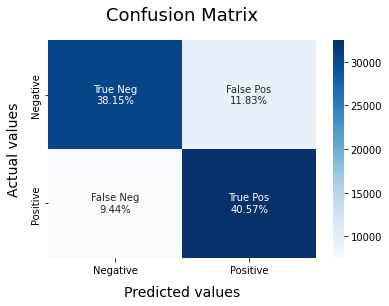

In [19]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

# BernoulliNB

              precision    recall  f1-score   support

           0       0.79      0.76      0.77     39989
           4       0.77      0.80      0.78     40011

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000



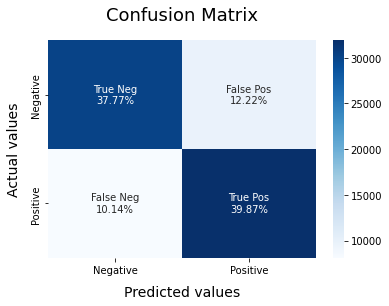

In [20]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

# Saving the model and vectorizer files

In [21]:
file = open('vectoriser','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

file = open('Sentiment-SVC.pickle','wb')
pickle.dump(SVCmodel, file)
file.close()

file = open('Sentiment-BNB.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()

# Testing the Models

In [22]:
file = open('./vectoriser', 'rb')
vectoriser = pickle.load(file)
file.close()
file = open('./Sentiment-LR.pickle', 'rb')
LRmodel = pickle.load(file)
file.close()
file = open('./Sentiment-BNB.pickle', 'rb')
BNBmodel = pickle.load(file)
file.close()
file = open('./Sentiment-SVC.pickle', 'rb')
SVCmodel = pickle.load(file)
file.close()
    

def predict1(vectoriser, model, tweet):
    textdata = vectoriser.transform(tweet)
    sentiment = model.predict(textdata)
    data = []
    for tweet, pred in zip(tweet, sentiment):
        data.append((tweet,pred))
    df = pd.DataFrame(data, columns = ['tweet','sentiment'])
    df = df.replace([0,4], ["Negative","Positive"])
    return df

def predict2(vectoriser, model, tweet):
    textdata = vectoriser.transform(tweet)
    sentiment = model.predict(textdata)
    data = []
    for tweet, pred in zip(tweet, sentiment):
        data.append((tweet,pred))
    df = pd.DataFrame(data, columns = ['tweet','sentiment'])
    df = df.replace([0,4], ["Negative","Positive"])
    return df

tweet = ["I hate Data ","I love Data ","He passed away at the age 70"]

print("Logistic Regression \n")
df = predict1(vectoriser, LRmodel, tweet)
print(df.head(), "\n")
print("BNB Model \n")
df = predict2(vectoriser, BNBmodel,tweet)
print(df.head(), "\n")
print("SVC Model \n")
df = predict2(vectoriser, SVCmodel,tweet)
print(df.head(),'\n' )

Logistic Regression 

                          tweet sentiment
0                  I hate Data   Negative
1                  I love Data   Positive
2  He passed away at the age 70  Negative 

BNB Model 

                          tweet sentiment
0                  I hate Data   Negative
1                  I love Data   Positive
2  He passed away at the age 70  Negative 

SVC Model 

                          tweet sentiment
0                  I hate Data   Negative
1                  I love Data   Positive
2  He passed away at the age 70  Negative 

